In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

N=10000

In [2]:
def running_mean(X,N,N1):
    "returns the mean up to the i-th point"
    Y=np.cumsum(X,axis=0)
    o=np.ones(N)
    o2=np.cumsum(o).reshape(-1,1)
    return(Y/o2)

# Gaussian

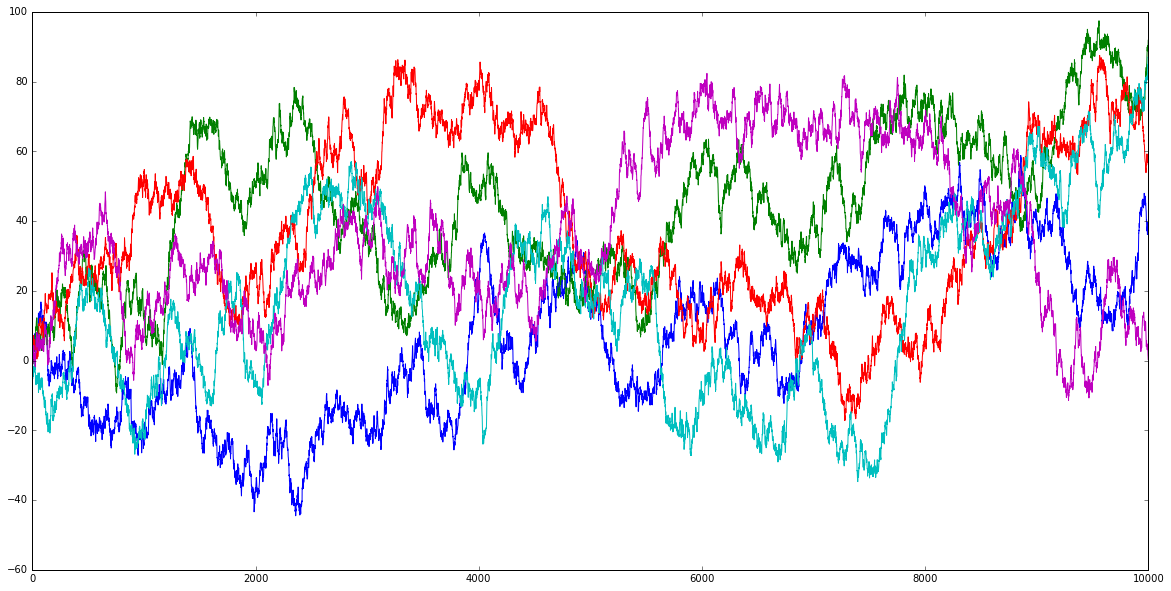

In [3]:
N1=5
X1=np.random.normal(0,1,N*N1)
X1=X1.reshape(N,N1)
    
plt.figure(figsize=(20,10))
S1=np.cumsum(X1,axis=0)
plt.plot(S1);

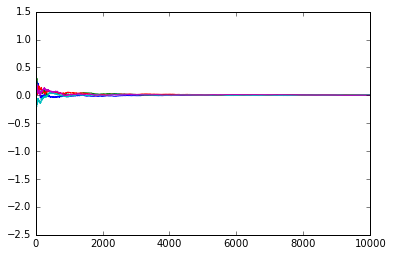

In [4]:
#this is the mean at each step
plt.plot(running_mean(X1,N,N1));

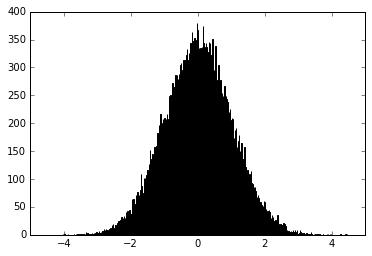

In [5]:
plt.hist(X1,bins=100);

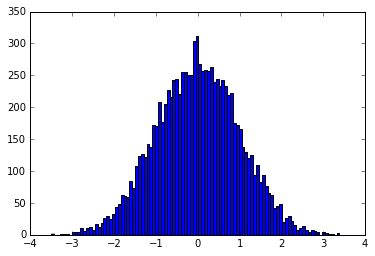

In [6]:
#I sum M1 realizations, and do this M2 times.
# I study how the M2 sums distribute

M1=100
M2=10000
std=10
A1=np.random.normal(0,std,M1*M2)
A1=A1.reshape(M1,M2)
A1_sum=A1.sum(axis=0)/np.sqrt(M1)/std
plt.hist(A1_sum,bins=100);

# Cauchy

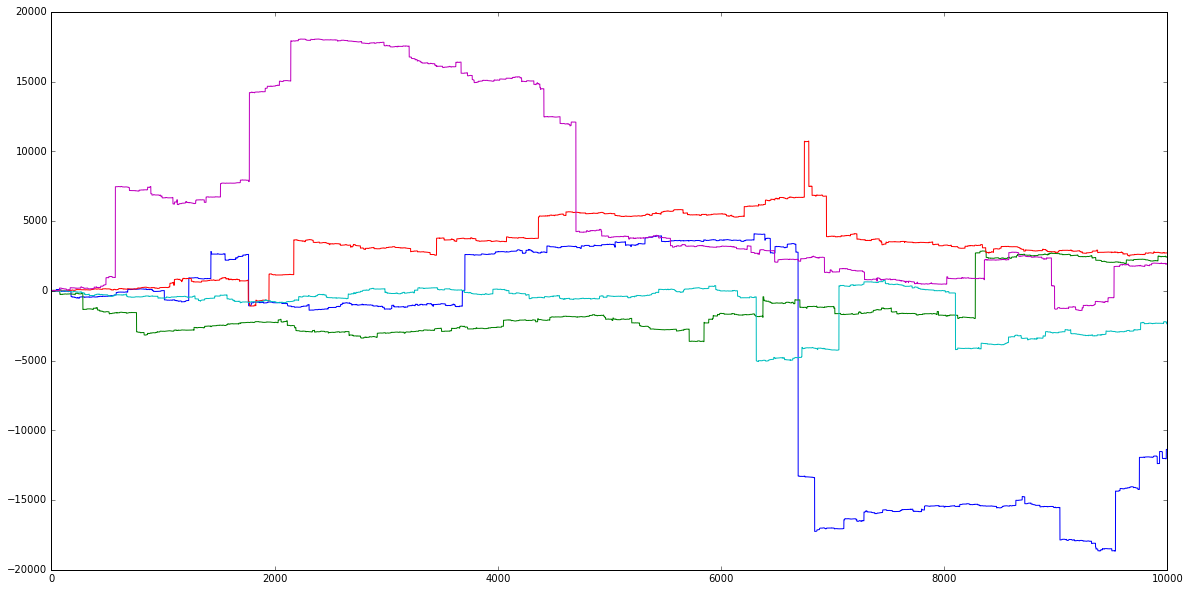

In [7]:
X2=np.random.standard_cauchy(N*N1)
X2=X2.reshape(N,N1)
S2=np.cumsum(X2,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S2);

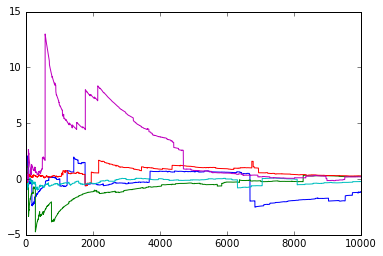

In [8]:
#pdf of the mean should not decay nor diverge; it is always of order 1
plt.plot(running_mean(X2,N,N1));

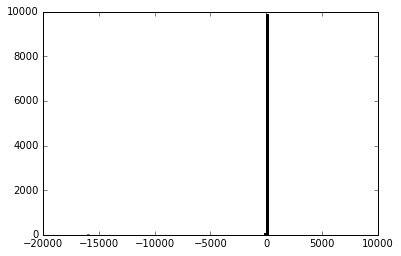

In [9]:
plt.hist(X2,bins=100);

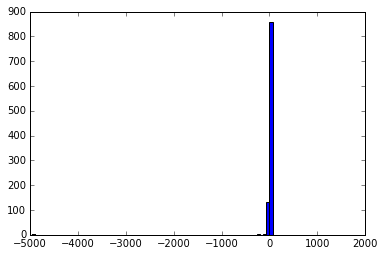

In [10]:
M1=100
M2=1000
A2=np.random.standard_cauchy(M1*M2)
A2=A2.reshape(M1,M2)
A2_sum=A2.sum(axis=0)/(M1)  #should still be cauchy (pdf of the sum)
plt.hist(A2_sum,bins=100);

# Uniform

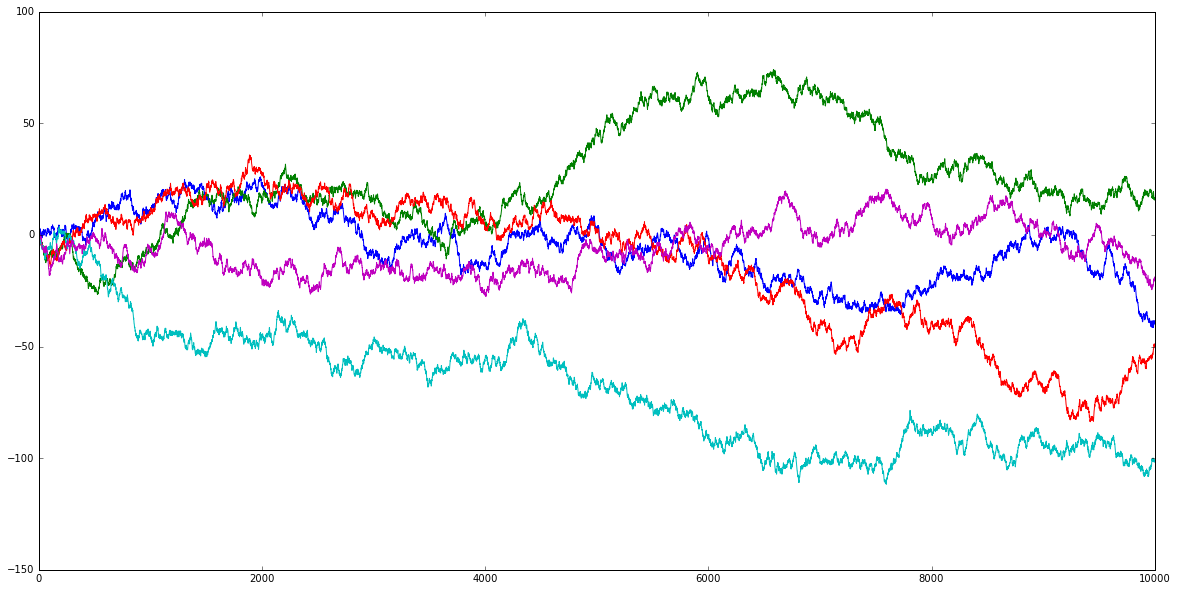

In [11]:
X3=np.random.uniform(-1,1,N*N1)
X3=X3.reshape(N,N1)
S3=np.cumsum(X3,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S3);

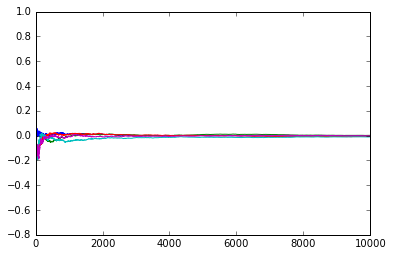

In [12]:
plt.plot(running_mean(X3,N,N1));

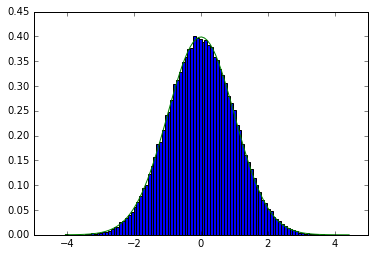

In [13]:
from scipy import stats
M1=100
M2=100000
A3=np.random.uniform(-1,1,M1*M2)
m,v,s,k=stats.uniform.stats(loc=0, scale=2, moments='mvsk')
A3=A3.reshape(M1,M2)
A3_sum=A3.sum(axis=0)/np.sqrt(M1*v)
hist=plt.hist(A3_sum,bins=100,normed=True)


plt.plot(hist[1],stats.norm.pdf(hist[1],0,1),label="gauss")

### corrections from gauss for the uniform

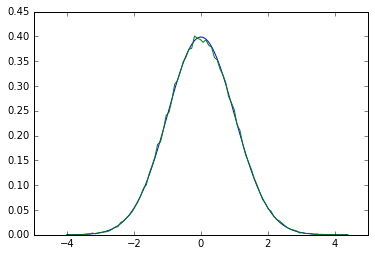

In [14]:
x=np.zeros(len(hist[0]))
for i in range(len(x)):
    x[i]=(hist[1][i]+hist[1][i+1])/2
    

plt.plot(x,stats.norm.pdf(x,0,1),label="gauss")
plt.plot(x,hist[0],label="hist")

In [15]:
h_c=[3,0,-6,0,1]
herm=np.zeros(len(x))
for i in range(5):
    herm+=h_c[i]*x**i
herm*=(k-3)/(24*M1*np.sqrt(v))

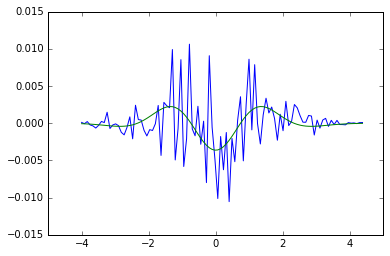

In [16]:
plt.plot(x,hist[0]-stats.norm.pdf(x,0,1),label="difference")
plt.plot(x,herm*stats.norm.pdf(x,0,1))

# Student

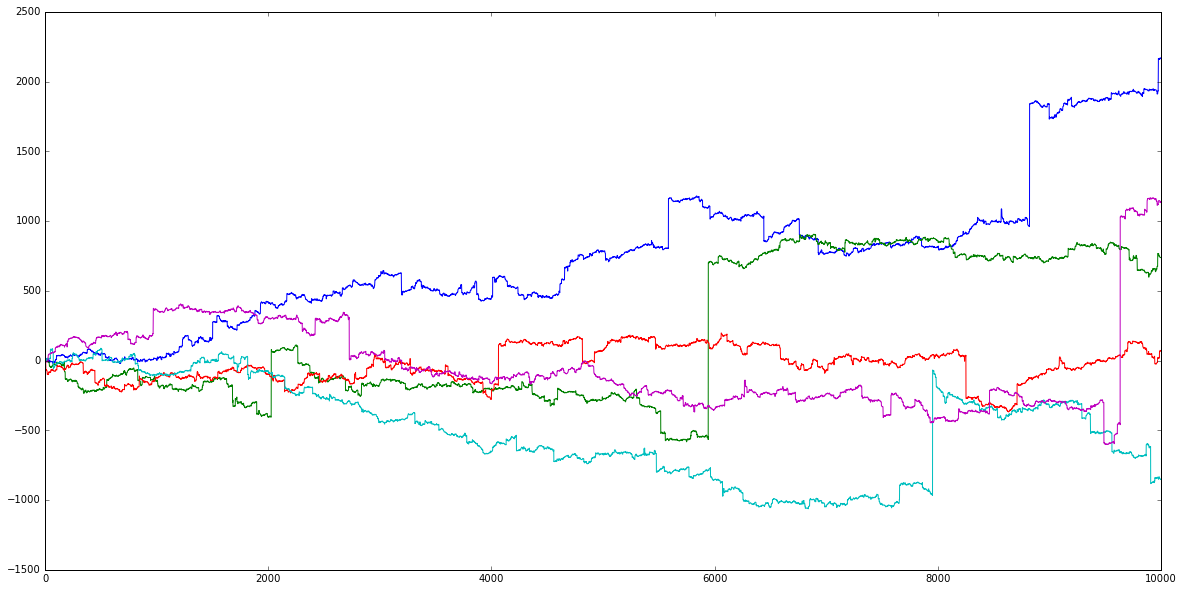

In [17]:
#goes like 1/x^(df+1) for large x (x>>sqrt(df))
#df=1 is the cauchy
#df=inf is the gaussian (wiener)
#df=2 looks like wiener but with jumps

df=1.5
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S4);

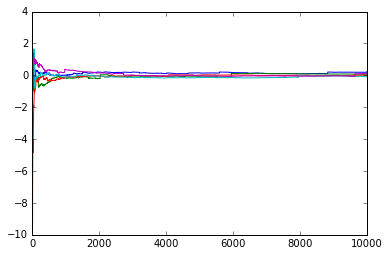

In [18]:
#mean of the series:
#diverges if df<1
#of order 1 if df=1 (cauchy)
# converges for df>1 (law large numbers ok)
plt.plot(running_mean(X4,N,N1));

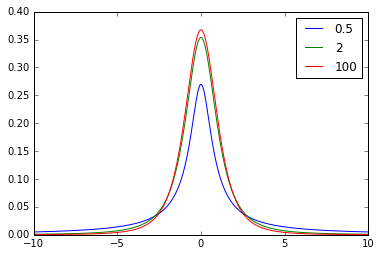

In [19]:
from scipy import stats
x=np.linspace(-10,10,1000)
plt.plot(x,stats.t.pdf(x,0.5),label="0.5")
plt.plot(x,stats.t.pdf(x,2),label="2")
plt.plot(x,stats.t.pdf(x,3),label="100")
plt.legend();

In [20]:
alpha=1
beta=0
#rv = stats.levy_stable(alpha, beta)
#plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

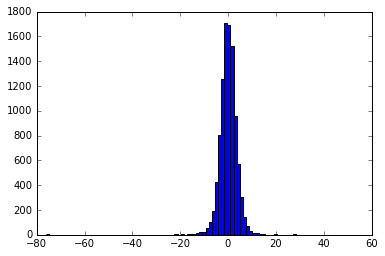

In [21]:
M1=1000
M2=10000
df=2
A4=np.random.standard_t(df,M1*M2)
A4=A4.reshape(M1,M2)
A4_sum=A4.sum(axis=0)/np.sqrt(M1)
plt.hist(A4_sum,bins=100);  

# Compare walks for different time length

### Gauss

In [22]:
N1=5
N2=1000
X1b=np.random.normal(0,1,N2*N1)
X1b=X1b.reshape(N2,N1)
S1b=np.cumsum(X1b,axis=0)
ratio=N/N2
print(ratio)

10.0


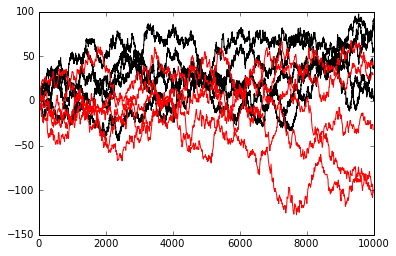

In [23]:
power=1/2

plt.plot(np.arange(0,S1.shape[0]),S1,c='k')
plt.plot(ratio*np.arange(0,S1b.shape[0]),ratio**power*S1b,c='r');


### Cauchy

In [24]:
X2b=np.random.standard_cauchy(N2*N1)
X2b=X2b.reshape(N2,N1)
S2b=np.cumsum(X2b,axis=0)

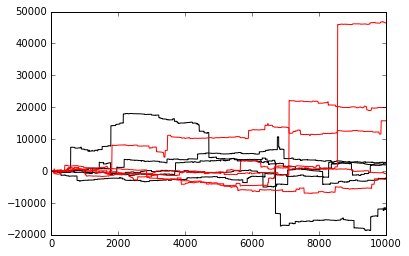

In [25]:
power=1

plt.plot(np.arange(0,S2.shape[0]),S2,c='k')
plt.plot(ratio*np.arange(0,S2b.shape[0]),ratio**power*S2b,c='r');

### Uniform

In [26]:
X3b=np.random.uniform(-1,1,N2*N1)
X3b=X3b.reshape(N2,N1)
S3b=np.cumsum(X3b,axis=0)

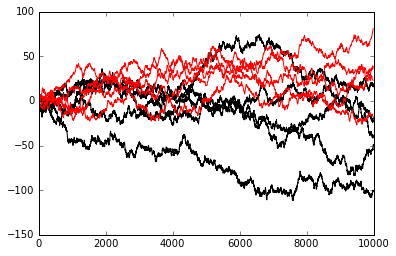

In [27]:
power=1/2

plt.plot(np.arange(0,S3.shape[0]),S3,c='k')
plt.plot(ratio*np.arange(0,S3b.shape[0]),ratio**power*S3b,c='r');

### Student

In [28]:
df=1
N1=10
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)
X4b=np.random.standard_t(df,N2*N1)
X4b=X4b.reshape(N2,N1)
S4b=np.cumsum(X4b,axis=0)

1.0


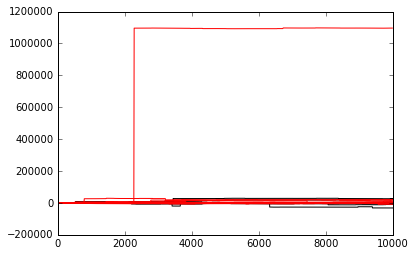

In [29]:
power=1/min(df,2)
print(power)

plt.plot(np.arange(0,S4.shape[0]),S4,c='k')
plt.plot(ratio*np.arange(0,S4b.shape[0]),ratio**power*S4b,c='r');

## Autocorrelation 

In [30]:
SS4=S4.cumsum(axis=1)

/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


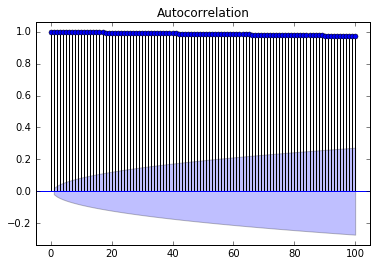

In [31]:
#import statsmodels as sm
#from statsmodels import graphics
import statsmodels.graphics.tsaplots
statsmodels.graphics.tsaplots.plot_acf(S4[:,2],lags=100);

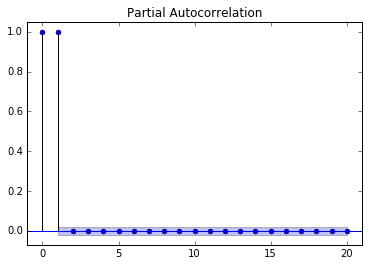

In [32]:
statsmodels.graphics.tsaplots.plot_pacf(S4[:,1],lags=20);

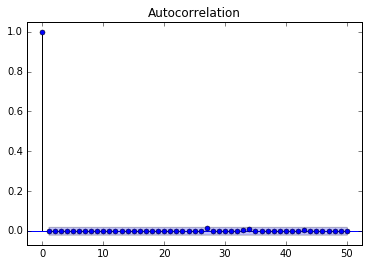

In [33]:
statsmodels.graphics.tsaplots.plot_acf(X4[:,1],lags=50);

In [34]:
import statsmodels.tsa.stattools
acf=statsmodels.tsa.stattools.acf(SS4[:,0],nlags=10)
acf

array([1.        , 0.99754278, 0.99508575, 0.99262733, 0.99016884,
       0.98770811, 0.98524896, 0.98279017, 0.98033682, 0.97788351,
       0.97542997])

In [35]:
pacf=statsmodels.tsa.stattools.pacf(SS4[:,0],nlags=10)
pacf

array([ 1.00000000e+00,  9.97642544e-01, -1.23979162e-03, -1.57687129e-03,
       -1.29863115e-03, -1.76231296e-03, -9.54277856e-04, -1.21075465e-03,
       -1.36832297e-04, -1.28037235e-03, -1.34016565e-03])

### MA model

(9997,)


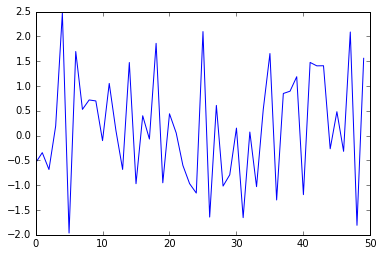

In [36]:
betas=np.array((1,-0.5,0.3,0.2))   #beta[0] is always one
MA1=np.convolve(X1[:,0],betas,mode='valid')
print(MA1.shape)
plt.plot(MA1[:50]);

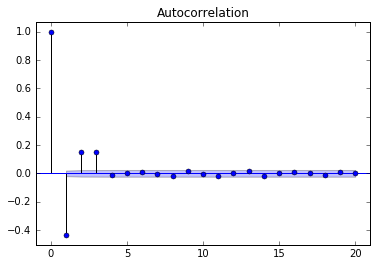

In [37]:
statsmodels.graphics.tsaplots.plot_acf(MA1,lags=20);

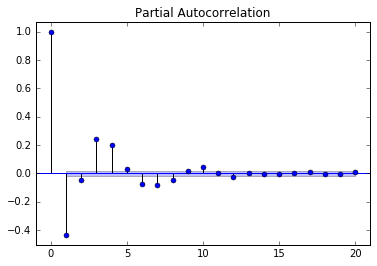

In [38]:
statsmodels.graphics.tsaplots.plot_pacf(MA1,lags=20);

### AR model

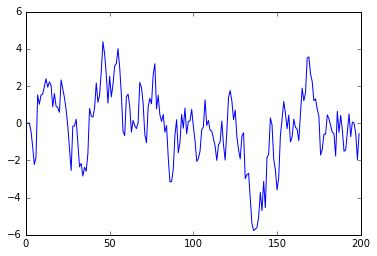

In [39]:
#alfas=np.array((0,1,-0.5))   #exa. 3.1 chapfield
alfas=np.array((0,0.8,0))   #alfa[0] is not used, since the alphas start from 1
Z=X1[:,0]
AR1=np.zeros(len(Z))
for t in range(len(alfas),len(Z)):
    for p in range(1,len(alfas)):
        AR1[t]+=AR1[t-p]*alfas[p]
    AR1[t]+=Z[t]
    
plt.plot(AR1[:200]);

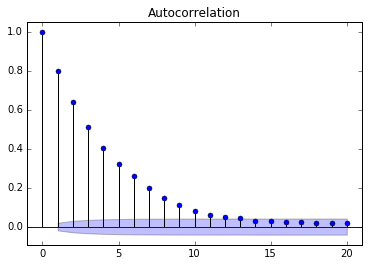

In [40]:
statsmodels.graphics.tsaplots.plot_acf(AR1,lags=20);

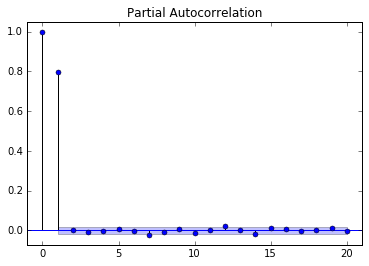

In [41]:
statsmodels.graphics.tsaplots.plot_pacf(AR1,lags=20);

### ARMA

generating a ( 1 , 0 , 1 ) process


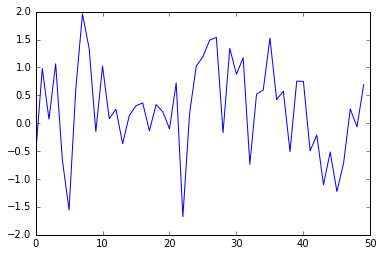

In [106]:
def generate_arma(Z,alfa_p,beta_q,integrate=False):
    """given noise Z and parameters alfa_p, beta_q, generate an ARMA process"""
    p=len(alfa_p)
    q=len(beta_q)
    if(integrate): print("generating a (",p,", 1 ,",q,") process")
    else:          print("generating a (",p,", 0 ,",q,") process")
    import numpy as np
    ARMA=Z.copy()
    for t in range(max(p,q),len(Z)):
        for i in range(p):
            ARMA[t]+=ARMA[t-i-1]*alfa_p[i]
        for j in range(q):
            ARMA[t]+=Z[t-j-1]*beta_q[j]
    if(integrate): return np.cumsum(ARMA)
    else:          return ARMA
  
Z=X1[:,1]
alfa_p=(0.5,)   #AR
beta_q=(-0.3,)  #MA
ARMA1=generate_arma(Z,alfa_p,beta_q)
plt.plot(ARMA1[:50]);

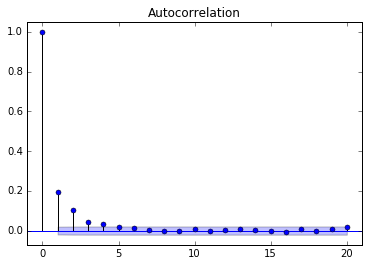

In [107]:
statsmodels.graphics.tsaplots.plot_acf(ARMA1,lags=20);

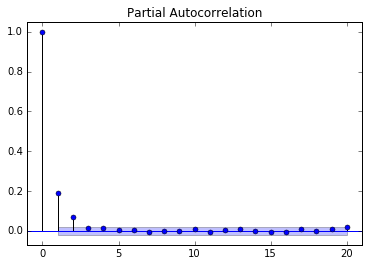

In [108]:
statsmodels.graphics.tsaplots.plot_pacf(ARMA1,lags=20);

### ARIMA
I integrate results from the ARMA model

generating a ( 1 , 1 , 1 ) process


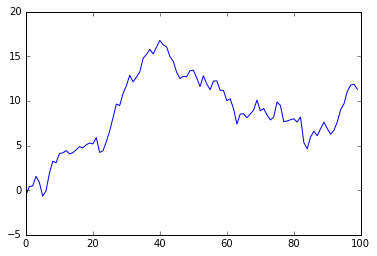

In [109]:
#ARIMA1=np.cumsum(ARMA1)
ARIMA1=generate_arma(Z,alfa_p,beta_q,integrate=True)
plt.plot(ARIMA1[:100]);

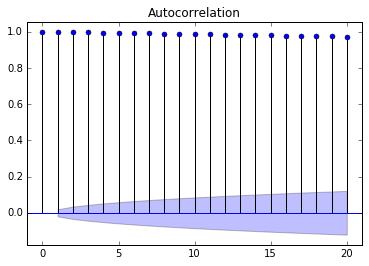

In [110]:
statsmodels.graphics.tsaplots.plot_acf(ARIMA1,lags=20);

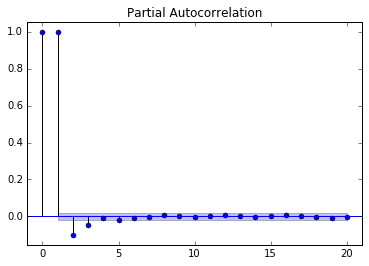

In [111]:
statsmodels.graphics.tsaplots.plot_pacf(ARIMA1,lags=20);

## Estimation of the parameters

(9997,)


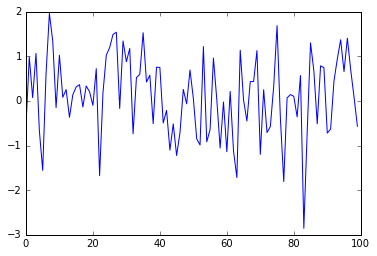

In [112]:
print(MA1.shape)
plt.plot(ARMA1[:100])

In [113]:
import pyramid
from pyramid.arima import ARIMA
import warnings
warnings.filterwarnings('ignore', '.*Conversion*',)

In [98]:
# fitting a stepwise model:
from pyramid.arima import auto_arima

fit = auto_arima(ARMA1, start_p=0, start_q=0, max_p=3, max_q=3,
                          seasonal=False, d=0, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=False)  # set to stepwise

Fit ARIMA: order=(0, 0, 0); AIC=28733.764, BIC=28748.185, Fit time=0.005 seconds
Fit ARIMA: order=(0, 0, 1); AIC=28412.521, BIC=28434.152, Fit time=0.067 seconds
Fit ARIMA: order=(0, 0, 2); AIC=28333.492, BIC=28362.333, Fit time=0.123 seconds
Fit ARIMA: order=(0, 0, 3); AIC=28324.280, BIC=28360.332, Fit time=0.164 seconds
Fit ARIMA: order=(1, 0, 0); AIC=28360.482, BIC=28382.113, Fit time=0.074 seconds
Fit ARIMA: order=(1, 0, 1); AIC=28314.209, BIC=28343.051, Fit time=1.576 seconds
Fit ARIMA: order=(1, 0, 2); AIC=28316.177, BIC=28352.228, Fit time=1.617 seconds
Fit ARIMA: order=(1, 0, 3); AIC=28317.103, BIC=28360.365, Fit time=2.108 seconds
Fit ARIMA: order=(2, 0, 0); AIC=28317.371, BIC=28346.213, Fit time=0.093 seconds
Fit ARIMA: order=(2, 0, 1); AIC=28316.171, BIC=28352.223, Fit time=1.515 seconds
Fit ARIMA: order=(2, 0, 2); AIC=28316.994, BIC=28360.256, Fit time=2.229 seconds
Fit ARIMA: order=(2, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 0); AIC=28317.452,

In [99]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(1, 1)   Log Likelihood              -14153.105
Method:                       css-mle   S.D. of innovations              0.996
Date:                Tue, 30 Jan 2018   AIC                          28314.209
Time:                        10:48:24   BIC                          28343.051
Sample:                             0   HQIC                         28323.972
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0128      0.014      0.942      0.346      -0.014       0.040
ar.L1.y        0.5170      0.040     12.951      0.000       0.439       0.595
ma.L1.y       -0.3389      0.044     -7.723      0.000      -0.425      -0.253
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9343           +0.0000j            1.9343            0.0000
MA.1            2.9505           +0.0000j            2.9505            0.0000
-----------------------------------------------------------------------------
"""

In [52]:
fit.params()

array([ 0.00780269,  0.06424428, -0.69015863,  0.43846981,  0.43222924,
        0.91709304,  0.01551359])

### residuals 
I can recover the original noise

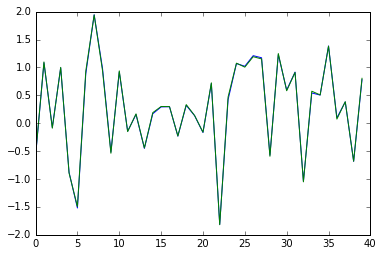

In [114]:
plt.plot(fit.resid()[:40])
plt.plot(Z[:40])

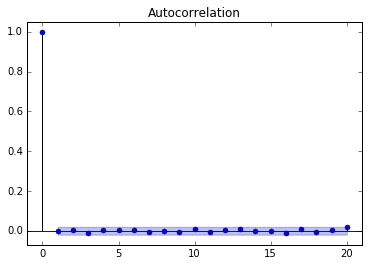

In [115]:
statsmodels.graphics.tsaplots.plot_acf(fit.resid(),lags=20);

Let's now underfit a (1,0,1) with a (0,0,1)

In [118]:
alfas=(0.8,)
betas=(0.5,)
ARMA2=generate_arma(Z,alfas,betas)

generating a ( 1 , 0 , 1 ) process


In [119]:
fit2 = ARIMA((0,0,1)).fit(ARMA2)
fit2.params()

array([0.06739105, 0.8462423 ])

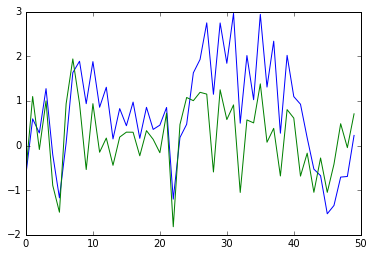

In [120]:
plt.plot(fit2.resid()[:50])
plt.plot(X1[:50,1])

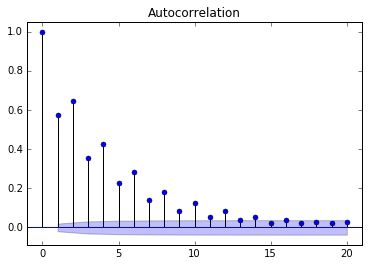

In [121]:
statsmodels.graphics.tsaplots.plot_acf(fit2.resid(),lags=20);

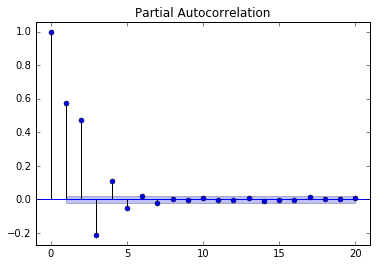

In [122]:
statsmodels.graphics.tsaplots.plot_pacf(fit2.resid(),lags=20);

and with a (1,0,0)

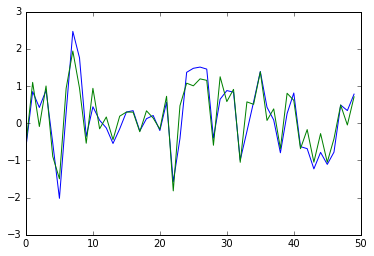

In [123]:
fit2b = ARIMA((1,0,0)).fit(ARMA2)
fit2b.params()
plt.plot(fit2b.resid()[:50])
plt.plot(X1[:50,1])

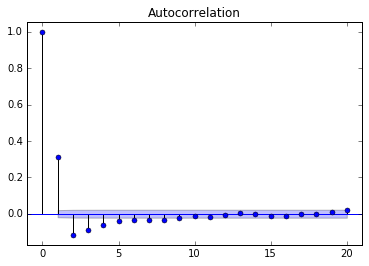

In [124]:
statsmodels.graphics.tsaplots.plot_acf(fit2b.resid(),lags=20);

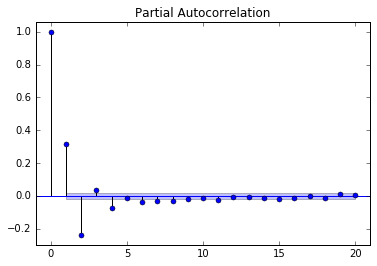

In [125]:
statsmodels.graphics.tsaplots.plot_pacf(fit2b.resid(),lags=20);

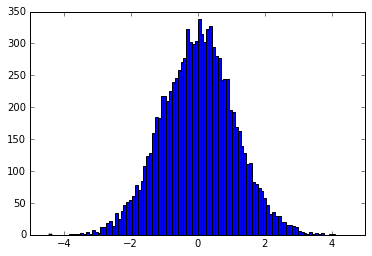

In [126]:
plt.hist(fit2b.resid(),bins=100);

### Forecasts

Exponential smoothing

In [127]:
def predict_exp_smooth(series,alpha=0.1):
    """eq (5.3) chapfield"""
    prediction=np.zeros(len(series))
    for i in range(0,len(series)-1):
        prediction[i+1]=alpha*series[i]+(1-alpha)*prediction[i]
    return prediction

def error_pes(alpha,series):
    from  sklearn.metrics import mean_squared_error as mse
    return (mse(series,predict_exp_smooth(series,alpha)))

1.1080014379849144

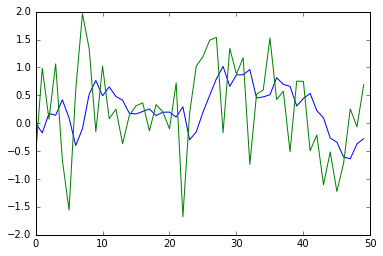

In [128]:
from  sklearn.metrics import mean_squared_error as mse
ARMA1_pes=predict_exp_smooth(ARMA1,0.3)
plt.plot(ARMA1_pes[:50])
plt.plot(ARMA1[:50]);
mse(ARMA1,ARMA1_pes)

In [129]:
series=MA1
print(error_pes(0,series))
print(error_pes(0.1,series))
print(error_pes(0.3,series))
print(error_pes(0.6,series))
print(error_pes(0.9,series))
print(error_pes(1,series))

1.3930405144752547
1.4937720500713354
1.7654190250819901
2.4071134168421366
3.481855935224475
3.9922057071375003


In [140]:
from scipy.optimize import minimize
print(minimize(error_pes,x0=0.5, args=(AR1),method='Nelder-Mead'))
print(minimize(error_pes,x0=0.1, args=(MA1),method='Nelder-Mead'))
print(minimize(error_pes,x0=0.1, args=(ARMA1),method='Nelder-Mead'))

 final_simplex: (array([[0.87265625],
       [0.87255859]]), array([1.10093175, 1.10093175]))
           fun: 1.1009317503657485
       message: 'Optimization terminated successfully.'
          nfev: 30
           nit: 15
        status: 0
       success: True
             x: array([0.87265625])
 final_simplex: (array([[-0.00027344],
       [-0.00023437]]), array([1.39265201, 1.39267975]))
           fun: 1.392652008980262
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 17
        status: 0
       success: True
             x: array([-0.00027344])
 final_simplex: (array([[7.81250000e-05],
       [1.94289029e-16]]), array([1.03588414, 1.03588624]))
           fun: 1.0358841443617428
       message: 'Optimization terminated successfully.'
          nfev: 32
           nit: 15
        status: 0
       success: True
             x: array([7.8125e-05])


In [198]:
ARIMA_011=generate_arma(X1[:,2],(),(0.3,),integrate=True)
minimize(error_pes,x0=0.5, args=(ARIMA_011),method='Nelder-Mead')

generating a ( 0 , 1 , 1 ) process


 final_simplex: (array([[1.30917969],
       [1.30908203]]), array([1.00613184, 1.00613184]))
           fun: 1.006131842583471
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 17
        status: 0
       success: True
             x: array([1.30917969])

Using ARIMA

In [224]:
fit_011.predict_in_sample?

In [223]:
fit_011 = ARIMA((0,1,1)).fit(ARIMA_011)
predict_ARIMA_011=fit_011.predict_in_sample()
fit_011.params()

array([0.00720557, 0.30901524])

In [226]:
fit_011b = auto_arima(ARIMA_011, start_p=0, start_q=0, max_p=2, max_q=2,
                          seasonal=False, d=1,  trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=False)  # set to stepwise

Fit ARIMA: order=(0, 1, 0); AIC=29350.115, BIC=29364.535, Fit time=0.011 seconds
Fit ARIMA: order=(0, 1, 1); AIC=28442.711, BIC=28464.342, Fit time=0.101 seconds
Fit ARIMA: order=(0, 1, 2); AIC=28444.694, BIC=28473.535, Fit time=0.145 seconds
Fit ARIMA: order=(1, 1, 0); AIC=28528.953, BIC=28550.584, Fit time=0.099 seconds
Fit ARIMA: order=(1, 1, 1); AIC=28444.695, BIC=28473.536, Fit time=1.681 seconds
Fit ARIMA: order=(1, 1, 2); AIC=28444.341, BIC=28480.392, Fit time=3.505 seconds
Fit ARIMA: order=(2, 1, 0); AIC=28451.331, BIC=28480.172, Fit time=0.126 seconds
Fit ARIMA: order=(2, 1, 1); AIC=28446.605, BIC=28482.656, Fit time=1.530 seconds
Fit ARIMA: order=(2, 1, 2); AIC=28446.158, BIC=28489.419, Fit time=3.632 seconds
Total fit time: 10.833 seconds


In [228]:
in_sample_preds = fit_011b.predict_in_sample()
mse(-ARIMA_011[1:],predict_ARIMA_011)

3457.0865509214564

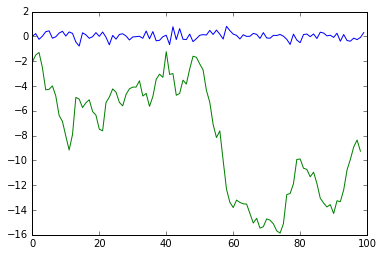

In [229]:
plt.plot(predict_ARIMA_011[:100])
plt.plot(-ARIMA_011[1:100])

In [230]:
from bokeh.plotting import figure, show, output_notebook
import pandas as pd

# init bokeh
output_notebook()

def plot_arima(truth, forecasts, title="ARIMA", xaxis_label='Time',
               yaxis_label='Value', c1='#A6CEE3', c2='#B2DF8A', 
               forecast_start=None, **kwargs):
    
    # make truth and forecasts into pandas series
    n_truth = truth.shape[0]
    n_forecasts = forecasts.shape[0]
    
    # always plot truth the same
    truth = pd.Series(truth, index=np.arange(truth.shape[0]))
    
    # if no defined forecast start, start at the end
    if forecast_start is None:
        idx = np.arange(n_truth, n_truth + n_forecasts)
    else:
        idx = np.arange(forecast_start, n_forecasts)
    forecasts = pd.Series(forecasts, index=idx)
    
    # set up the plot
    p = figure(title=title, plot_height=400, **kwargs)
    p.grid.grid_line_alpha=0.3
    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = yaxis_label
    
    # add the lines
    p.line(truth.index, truth.values, color=c1, legend='Observed')
    p.line(forecasts.index, forecasts.values, color=c2, legend='Forecasted')
    
    return p

Loading BokehJS ...

In [231]:
show(plot_arima(ARIMA_011, in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', forecast_start=0))

## Spectrum
FT of the covariance/correlation function

In [232]:
from scipy.signal import periodogram

In [260]:
def sdf_ar(x,alpha):
    return 1/np.pi/(1-2*alpha*np.cos(2*np.pi*x)+alpha**2)
sdf_ar=np.vectorize(sdf_ar)

def sdf_ma(x,beta):
    return 1/np.pi*(1+2*beta*np.cos(2*np.pi*x)/(1+beta**2))
sdf_ma=np.vectorize(sdf_ma)

Raw

generating a ( 1 , 0 , 0 ) process


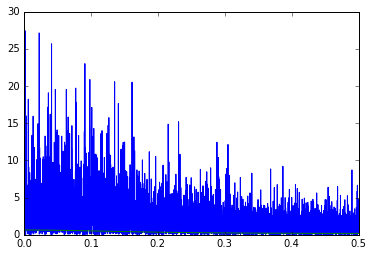

In [264]:
alpha=0.3
AR=generate_arma(X1[:,2],(alpha,),(),integrate=False)
f, Pxx_den= periodogram(AR)
plt.plot(f,Pxx_den)
plt.plot(f,sdf_ar(f,alpha))

With window

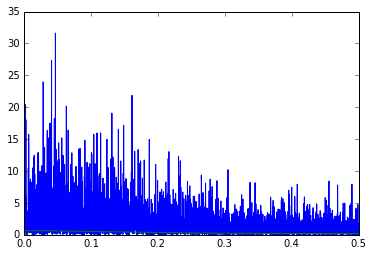

In [310]:
from scipy.signal import get_window
#don't know how to use window
f, Pxx_den= periodogram(AR, window=get_window('hann', len(AR)))
#f, Pxx_den= periodogram(AR, window=get_window(('kaiser', 700.0), len(AR)))
#f, Pxx_den= periodogram(AR)
plt.plot(f,Pxx_den)
plt.plot(f,sdf_ar(f,beta))

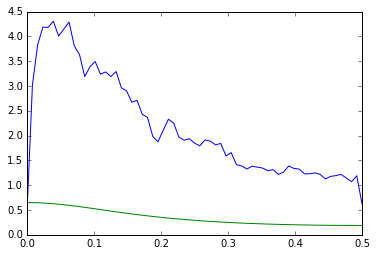

In [326]:
from scipy.signal import welch
f,Pxx_den= welch(AR,nperseg=128)
plt.plot(f,Pxx_den)
plt.plot(f,sdf_ar(f,beta))

generating a ( 0 , 0 , 1 ) process


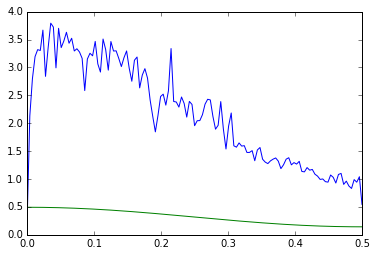

In [319]:
beta=0.3
MA=generate_arma(X1[:,2],(),(beta,),integrate=False)
f,Pxx_den= welch(MA)
#f, Pxx_den= periodogram(MA)
plt.plot(f,Pxx_den)
plt.plot(f,sdf_ma(f,beta))

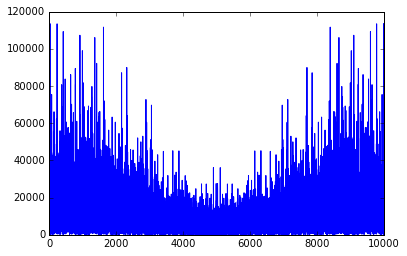

In [272]:
#from scipy.fftpack import fft, ifft
#plt.plot(np.abs(fft(MA))**2)